In [1]:
# Function API Model

In [2]:
import tensorflow as tf

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.california_housing.load_data()

In [4]:
val_size = 0.1
ix = int(X_train_full.shape[0] * val_size)
ix

1651

In [5]:
X_train, X_val = X_train_full[ix:], X_train_full[:ix]
y_train, y_val = y_train_full[ix:], y_train_full[:ix]

layer1 = Normalization()

layer2 = Dense(layer1)

layer3 = Dense(layer2)

layer5 = Dense(layer3)

layer6 = concat(layer1, layer5)

output = Dense(layer6)

                    ---------------------------------->(wide network)
                    
    X --> input --> layer1                                   layer6 ---> output
        
                    layer2 ---> layer3 ---> layer5 --->(deep network)

In [6]:
input_layer = tf.keras.layers.Input(shape=X_train.shape[-1:])

norm_layer = tf.keras.layers.Normalization()(input_layer) # layer1

hidden1 = tf.keras.layers.Dense(300, activation="relu")(norm_layer) # layer2
hidden2 = tf.keras.layers.Dense(200, activation="relu")(hidden1) # layer3
hidden3 = tf.keras.layers.Dense(100, activation="relu")(hidden2) # layer5

concat = tf.keras.layers.Concatenate()([norm_layer, hidden3])

output_layer = tf.keras.layers.Dense(1, activation="relu")(concat)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer = optimizer,
    loss = "mse",
    metrics = ["RootMeanSquaredError"]
)

In [8]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_val, y_val))

Epoch 1/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 178924.2500 - loss: 32606490624.0000 - val_RootMeanSquaredError: 107428.9297 - val_loss: 11540974592.0000
Epoch 2/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 105959.2656 - loss: 11231289344.0000 - val_RootMeanSquaredError: 101376.8281 - val_loss: 10277261312.0000
Epoch 3/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 101242.3828 - loss: 10250598400.0000 - val_RootMeanSquaredError: 98653.8438 - val_loss: 9732581376.0000
Epoch 4/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 97212.3516 - loss: 9451752448.0000 - val_RootMeanSquaredError: 97371.7031 - val_loss: 9481248768.0000
Epoch 5/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 94011.8203 - loss: 8839469056.0000 - val_RootMeanSquaredError: 88079.2969 - val_loss: 7757962240.0000
Epoch 6/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 89046.7266 - loss: 79309

<Axes: >

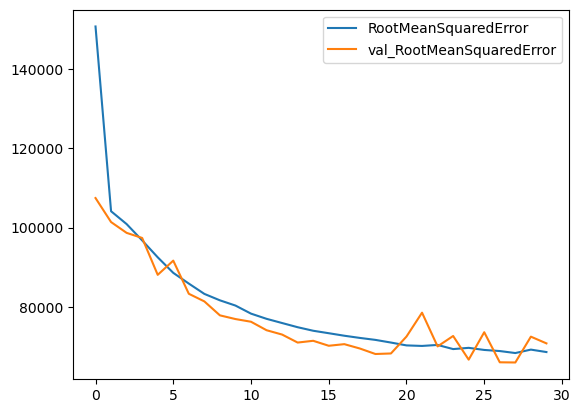

In [9]:
import pandas as pd
error = pd.DataFrame(history.history)
error[["RootMeanSquaredError", "val_RootMeanSquaredError"]].plot()

In [10]:
model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 73239.0391 - loss: 5367779328.0000


[5185476608.0, 72010.25]

In [11]:
# new model

In [12]:
input_deep = tf.keras.layers.Input(shape=[6, ])
input_wide = tf.keras.layers.Input(shape=[4, ])

norm_deep = tf.keras.layers.Normalization()(input_deep)
norm_wide = tf.keras.layers.Normalization()(input_wide)
norm_wide = tf.keras.layers.Dense(100, activation='relu')(norm_wide)

hidden1 = tf.keras.layers.Dense(300, activation='relu')(input_deep)
hidden2 = tf.keras.layers.Dense(200, activation='relu')(hidden1)
hidden3 = tf.keras.layers.Dense(100, activation='relu')(hidden2)

concat = tf.keras.layers.concatenate([norm_wide, hidden3])

output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

model.compile(optimizer=optimizer,
             loss="mse",
             metrics=["RootMeanSquaredError"])

model.fit((X_train[:, :4], X_train[:, 2:]), y_train, epochs=30,
         validation_data = ((X_val[:, :4], X_val[:, 2:]), y_val))

Epoch 1/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 236528.7188 - loss: 55951880192.0000 - val_RootMeanSquaredError: 230308.3125 - val_loss: 53041922048.0000
Epoch 2/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 236288.2031 - loss: 55836463104.0000 - val_RootMeanSquaredError: 227593.9062 - val_loss: 51798982656.0000
Epoch 3/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 232496.3438 - loss: 54060302336.0000 - val_RootMeanSquaredError: 222178.1719 - val_loss: 49363140608.0000
Epoch 4/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 225404.0625 - loss: 50811719680.0000 - val_RootMeanSquaredError: 212608.3438 - val_loss: 45202305024.0000
Epoch 5/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 215591.8125 - loss: 46489411584.0000 - val_RootMeanSquaredError: 199276.1406 - val_loss: 39710978048.0000
Epoch 6/30
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 200962.4375 - 

In [13]:
model.save("housing_prediction.h5")

In [14]:
model.save("housing_prediction.keras")